## Homework 3

### Dataset

In this homework, I will use the Bank Marketing dataset. I download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

Or I can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
```

I need to take `bank/bank-full.csv` file from the downloaded zip-file.  
In this dataset our desired target for classification task will be `y` variable - has the client subscribed a term deposit or not. 

### Features

For the rest of the homework, I'll need to use only these columns:

* `age`,
* `job`,
* `marital`,
* `education`,
* `balance`,
* `housing`,
* `contact`,
* `day`,
* `month`,
* `duration`,
* `campaign`,
* `pdays`,
* `previous`,
* `poutcome`,
* `y`

### Data preparation

* Select only the features from above.
* Check if the missing values are presented in the features.

In [1]:
# !wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(legacy='1.25')
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import io

In [3]:
# outer_zip_file_path = '/workspaces/machine-learning-zoomcamp/03-churn_prediction_project/bank+marketing.zip'
# inner_zip_file_name = 'bank.zip'

# with zipfile.ZipFile(outer_zip_file_path, 'r') as outer_zip:
#     with outer_zip.open(inner_zip_file_name) as inner_zip_bytes:
#         with zipfile.ZipFile(io.BytesIO(inner_zip_bytes.read()), 'r') as inner_zip:
#             with inner_zip.open('bank-full.csv') as csv_file:
#                 df = pd.read_csv(csv_file, sep=';')
# df.tail()

In [4]:
df = pd.read_csv('bank-full.csv', sep=';')
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
len(df)

45211

In [6]:
del df['default']
del df['loan']
df.tail()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,2971,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `education`?

- `unknown`
- `primary`
- **`secondary`**
- `tertiary`

In [8]:
df.education.mode()[0]

'secondary'

In [9]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `age` and `balance`
- `day` and `campaign`
- `day` and `pdays`
- **`pdays` and `previous`**

In [10]:
numerical = list(df.dtypes[df.dtypes != object].index)
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

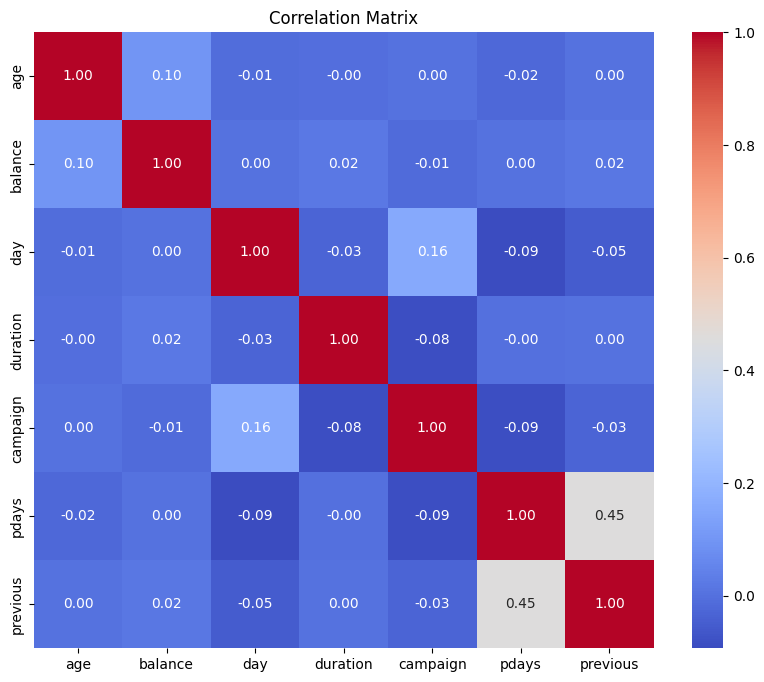

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [12]:
df[numerical].corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [13]:
df[numerical].corr().unstack().sort_values(ascending = False)

age       age         1.000000
balance   balance     1.000000
day       day         1.000000
campaign  campaign    1.000000
duration  duration    1.000000
pdays     pdays       1.000000
previous  previous    1.000000
pdays     previous    0.454820
previous  pdays       0.454820
day       campaign    0.162490
campaign  day         0.162490
balance   age         0.097783
age       balance     0.097783
balance   duration    0.021560
duration  balance     0.021560
previous  balance     0.016674
balance   previous    0.016674
campaign  age         0.004760
age       campaign    0.004760
balance   day         0.004503
day       balance     0.004503
balance   pdays       0.003435
pdays     balance     0.003435
previous  age         0.001288
age       previous    0.001288
duration  previous    0.001203
previous  duration    0.001203
pdays     duration   -0.001565
duration  pdays      -0.001565
age       duration   -0.004648
duration  age        -0.004648
age       day        -0.009120
day     

### Target encoding

* Now we want to encode the `y` variable.
* Let's replace the values `yes`/`no` with `1`/`0`.

In [14]:
df.y = (df.y == 'yes').astype(int)
df.tail()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0
45210,37,entrepreneur,married,secondary,2971,no,cellular,17,nov,361,2,188,11,other,0


In [15]:
df.y.value_counts(normalize=True)

y
0    0.883015
1    0.116985
Name: proportion, dtype: float64

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [18]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `contact`
- `education`
- `housing`
- **`poutcome`**

In [21]:
from sklearn.metrics import mutual_info_score

In [22]:
categorical = list(df.dtypes[df.dtypes == object].index)
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [23]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, y_train)

In [24]:
mi = df_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False).to_frame(name='MI')

,MI
poutcome,0.029533
month,0.025090
contact,0.013356
housing,0.010343
job,0.007316
education,0.002697
marital,0.002050


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.6
- 0.7
- 0.8
- **0.9**

**One-hot encoding:**

In [25]:
from sklearn.feature_extraction import DictVectorizer

In [26]:
dv = DictVectorizer(sparse=False)

In [27]:
train_dict = df_train.to_dict(orient='records')
train_dict[0]

{'age': 32,
 'job': 'technician',
 'marital': 'single',
 'education': 'tertiary',
 'balance': 1100,
 'housing': 'yes',
 'contact': 'cellular',
 'day': 11,
 'month': 'aug',
 'duration': 67,
 'campaign': 1,
 'pdays': -1,
 'previous': 0,
 'poutcome': 'unknown'}

In [28]:
X_train = dv.fit_transform(train_dict)
X_train.shape

(27126, 47)

In [29]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [30]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

**Logistic Regression training:**

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [33]:
model.intercept_[0]

-0.9986954125885577

In [34]:
model.coef_[0].round(3)

array([ 0.   ,  0.   , -0.081,  0.254,  0.079, -1.331,  0.01 ,  0.004,
       -0.439, -0.251, -0.066, -0.243, -0.142, -0.857,  0.09 , -0.213,
       -0.271, -0.351, -0.086,  0.251, -0.302, -0.12 ,  0.304, -0.148,
        0.04 , -0.191, -0.344, -0.477, -0.178, -0.025, -0.737,  0.42 ,
       -0.339, -1.248, -1.054,  0.327,  1.54 , -0.512, -0.996,  0.8  ,
        0.824, -0.   , -0.819, -0.632,  1.476, -1.024,  0.008])

**Accuracy of the model:**

In [35]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.0130081 , 0.00960864, 0.1567942 , ..., 0.0521836 , 0.00891037,
       0.28141048])

In [36]:
y_decision = (y_pred >= 0.5)

In [37]:
original_accuracy = (y_val == y_decision).mean()

In [38]:
original_accuracy.round(2)

0.9

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- **`age`**
- `balance`
- `marital`
- `previous`

> **Note**: The difference doesn't have to be positive.

In [45]:
from sklearn.metrics import accuracy_score

In [44]:
features = df_train.columns.to_list()
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [49]:
original_score = original_accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=1.0, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, abs(original_score - score)]

In [52]:
scores.sort_values('difference')

,eliminated_feature,accuracy,difference
0,age,0.901017,0.000000
3,education,0.901017,0.000000
5,housing,0.901017,0.000000
1,job,0.901128,0.000111
4,balance,0.900796,0.000221
12,previous,0.901239,0.000221
11,pdays,0.900686,0.000332
7,day,0.901570,0.000553
6,contact,0.900354,0.000664
2,marital,0.900243,0.000774


In [51]:
min_diff = scores.difference.min()
scores[scores.difference == min_diff]

,eliminated_feature,accuracy,difference
0,age,0.901017,0.0
3,education,0.901017,0.0
5,housing,0.901017,0.0


In [39]:
def accuracy(df_train, y_train, df_val, y_val, feature_to_drop):
    df_train_modified = df_train.drop(columns=[feature_to_drop])
    df_val_modified = df_val.drop(columns=[feature_to_drop])
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train_modified.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val_modified.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model = model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:,1]
    y_decision = (y_pred >= 0.5)

    return (y_val == y_decision).mean()

In [40]:
accuracies = {}
differences = []

for feature in df_train.columns:
    if feature not in df_train.columns:
        continue
    acc = accuracy(df_train, y_train, df_val, y_val, feature)
    accuracies[feature] = acc
    accuracy_difference = original_accuracy - acc
    abs_difference = abs(accuracy_difference)
    differences.append((abs_difference, feature, acc))
    print(f'Accuracy without {feature}: {acc} (Difference from original: {abs_difference})')

smallest_difference, corresponding_feature, corresponding_accuracy = min(differences, key=lambda x: x[0])
print(f'Smallest difference: {smallest_difference}, corresponding feature excluded: {corresponding_feature}, resulting accuracy: {corresponding_accuracy}')

Accuracy without age: 0.9010174740101747 (Difference from original: 0.0)
Accuracy without job: 0.9011280690112807 (Difference from original: 0.0001105950011059953)
Accuracy without marital: 0.9002433090024331 (Difference from original: 0.000774165007741634)
Accuracy without education: 0.9010174740101747 (Difference from original: 0.0)
Accuracy without balance: 0.9007962840079629 (Difference from original: 0.00022119000221187957)
Accuracy without housing: 0.9010174740101747 (Difference from original: 0.0)
Accuracy without contact: 0.900353904003539 (Difference from original: 0.0006635700066357497)
Accuracy without day: 0.9015704490157045 (Difference from original: 0.0005529750055297544)
Accuracy without month: 0.8995797389957974 (Difference from original: 0.0014377350143773837)
Accuracy without duration: 0.8900685689006856 (Difference from original: 0.010948905109489093)
Accuracy without campaign: 0.9002433090024331 (Difference from original: 0.000774165007741634)
Accuracy without pdays

In [41]:
original_accuracy

0.9010174740101747

### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- **1**
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [53]:
def calculate_accuracy(df_train, y_train, df_val, y_val, C):
    dv = DictVectorizer(sparse=False)
    train_dict = df_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model = model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:,1]
    y_decision = (y_pred >= 0.5)

    return (y_val == y_decision).mean()

In [54]:
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = {}

for C in C_values:
    acc = calculate_accuracy(df_train, y_train, df_val, y_val, C)
    accuracies[C] = round(acc, 3)
    print(f'Accuracy for C={C}: {accuracies[C]}')

print("\nAccuracies for different C values:", accuracies)

Accuracy for C=0.01: 0.899
Accuracy for C=0.1: 0.9
Accuracy for C=1: 0.901
Accuracy for C=10: 0.901
Accuracy for C=100: 0.901

Accuracies for different C values: {0.01: 0.899, 0.1: 0.9, 1: 0.901, 10: 0.901, 100: 0.901}
